In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

deliveries = pd.read_csv("/content/cleaned_deliveries.csv")
matches = pd.read_csv("/content/cleaned_matches (1).csv")

In [2]:
batting_stats = deliveries.groupby('batter').agg(
    runs_scored=('batsman_runs', 'sum'),
    balls_faced=('ball', 'count'),
    fours=('batsman_runs', lambda x: (x==4).sum()),
    sixes=('batsman_runs', lambda x: (x==6).sum()),
    dismissals=('player_dismissed', lambda x: x.notnull().sum())
).reset_index()

In [3]:

batting_stats['strike_rate'] = (batting_stats['runs_scored'] / batting_stats['balls_faced']) * 100
batting_stats['batting_average'] = batting_stats['runs_scored'] / batting_stats['dismissals'].replace(0, 1)
batting_stats['boundary_percentage'] = ((batting_stats['fours'] + batting_stats['sixes']) / batting_stats['balls_faced']) * 100

In [4]:
features = ['strike_rate', 'batting_average', 'boundary_percentage']
X = batting_stats[features]

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
dbscan = DBSCAN(eps=1.2, min_samples=3)  # tweak parameters
batting_stats['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

In [7]:
pca_result = PCA(n_components=2).fit_transform(X_scaled)

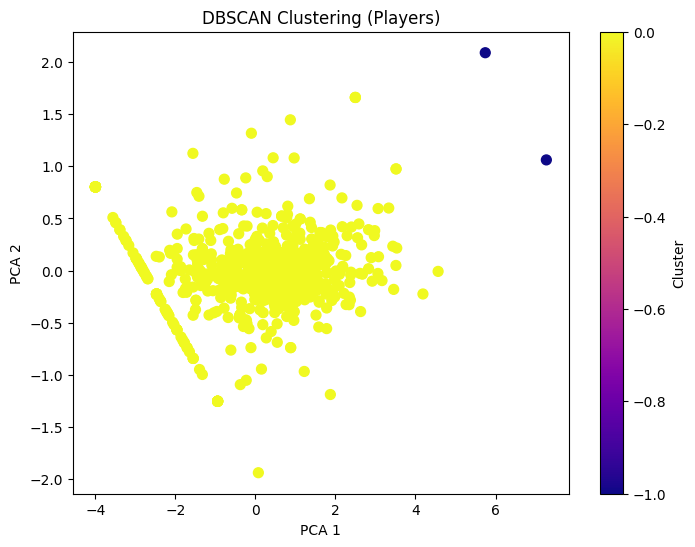

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=batting_stats['DBSCAN_Cluster'], cmap='plasma', s=50)
plt.title('DBSCAN Clustering (Players)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()